<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="10">  Scientific Calculus and Applications (SCA) </font></p>
<p><font size="10">  Linear Systems</font></p>
</p></br>
</p>
</CENTER>

----------------------------
# Numerical Méthods

# Lab : Resolution of linear algebraic systems
    
We consider the following electrical circuit, consisting of $n$ blocks, $n$ vary. 

Resistance values $k_1,...k_n$   and voltages $U_1,...,U_n$ are fixed.

<img src="circuit.jpg" width="600" align="center"/>

Purpose: Determine the value of currents $I_1 , . . . , I_n$.

Note: For this first lab, the skeletons of the expected python functions and scripts are given to you by this notebook, and you will only have to complete them in the places indicated by  "... ." or by "to fill". You are free to use it or not.

# Questions

## 1) Modelization

Using the Kirchoff laws, model the problem in form of a linear algebraic system

$$Ax = b.$$

You will begin with mesh 1, then mesh 2, ...

b contains the voltages

x contains the intensities (which is unknown)

NB: Ohm's law: U=RI
<img src="fig_res.jpg" width="200" align="center"/>

Complete this cell (in latex) in order to present the linear algebric system
A contains resistances and b the voltages
x will be the currents to find.
 
    #Picture joined to the notebook

## 2) Initialization

The first step is to initialize the number $n$ of voltages and resistance, the voltages in vector $u$ and the resistances' values in vector $k$ in python script.

Create (or complete) the following script:
    

- Create variable $n$ and initialize it to 10.

- Build a vector $k$ containing the values of the resistances, which are fixed at $100Ω$

- Build a vector $u$ containing the voltage values, all set at $1V$

Then run it.

NB: the function np.ones((m,n)) return an array size (m,n)) of ones.
 

In [2]:
%matplotlib inline
from pylab import *
from matplotlib import pyplot
import numpy as np
import scipy as sp
import scipy.linalg   # SciPy Linear Algebra Library

# Initialization of the variables n, k and b
# n: 10
# k: resistor values (vector (n, 1))
# u: voltage values (vector (n, 1))

n = 10
k = 100 * (np.ones((n,1)))
u = np.ones((n,1))



## 3) Construction of the matrix

- Create (or complete) the following function "matrice_circuit" which takes as input the vector $k$ of resistances and returns the matrix $A$ of the linear system.

- Then run this function (in order to use it in the python script).

Warning: *you should not assume anything here about the values of the resistances (they could be different)*.

NB: 

- the function np.zeross((m,n)) return an array (size (m,n)) of zeros.

- A[i,j]=10 : initialize the $A_{i,j}$ to 10

In [3]:
# function to initialize matrix A from the vector of resistance
# according to the matrix defined in 1)
# input: k, vector of resistors
# output: matrix A
# we use the matricial system found in 1) 

def matrice_circuit(k):
    
    n = size(k)
    A = np.zeros((n,n))
    A[0,0] = k[0,0]
    A[0,1] = -k[1,0]
    for j in range(1,n-1):
        A[j,j-1] = -k[j-1,0]
        A[j,j] = k[j-1,0] + k[j,0]
        A[j,j+1] = - k[j+1,0]
    A[n-1,n-2] = -k[n-2,0]
    A[n-1,n-1] = k[n-2,0] + k[n-1,0]
    return(A)

- Complete and run the following cell in order to display the previously defined matrix (check that it corresponds to what you expect)

In [4]:
# calculation of matrix A
A=matrice_circuit(k);

# display of matrix A
print (A)


[[ 100. -100.    0.    0.    0.    0.    0.    0.    0.    0.]
 [-100.  200. -100.    0.    0.    0.    0.    0.    0.    0.]
 [   0. -100.  200. -100.    0.    0.    0.    0.    0.    0.]
 [   0.    0. -100.  200. -100.    0.    0.    0.    0.    0.]
 [   0.    0.    0. -100.  200. -100.    0.    0.    0.    0.]
 [   0.    0.    0.    0. -100.  200. -100.    0.    0.    0.]
 [   0.    0.    0.    0.    0. -100.  200. -100.    0.    0.]
 [   0.    0.    0.    0.    0.    0. -100.  200. -100.    0.]
 [   0.    0.    0.    0.    0.    0.    0. -100.  200. -100.]
 [   0.    0.    0.    0.    0.    0.    0.    0. -100.  200.]]


In order to know the expected value of $x$, implement and test directly using the adequate python function. It could be useful in the next section.

NB: 

- the function B=np.linalg.inv(A) inverts a matrix

- the function C=np.matmul(A,B) gives the result C of the product between A and B


you could also used 

- np.linalg.solve(a, b) give the solustion of ax=b

In [5]:
B = np.linalg.inv(A)
x = np.matmul(B,u)
print(x)

[[0.55]
 [0.54]
 [0.52]
 [0.49]
 [0.45]
 [0.4 ]
 [0.34]
 [0.27]
 [0.19]
 [0.1 ]]


## 4) Gauss-Seidel method
    
    
The Gauss-Seidel will be implemented in two steps (functions): iteration and you include it in the algorithm where a criterion of precision is applied (cf. lecture note). 
    
- Create (or complete) the function-script gauss_seidel_iter which performs an iteration of the Gauss-Seidel method, ie computes $x(k+1)$  according to $A$, $b$  and $x (k)$.

In [6]:
# Iterate the Gauss-Seidel method
# to solve Ax = b.
# input: matrix A, vector b and x^{k} (current vector)
# output: x^{k + 1}
def gauss_seidel_iter(A,b,x):

    n = size(b)
    TrigInf = np.zeros((n,n)) #corresponds to the triangular submatrix P 
    for i in range(n):
        for j in range(i+1):
            TrigInf[i,j] = A[i,j]
    TrigSup = np.zeros((n,n)) #corresponds to the matrix N
    for i in range(n):
        for j in range(i+1,n):
            TrigSup[i,j] = A[i,j]
    D = np.linalg.inv(TrigInf)
    E = np.matmul(TrigSup,x)
    x = np.matmul(D,b-E)
    
    return(x)

- Create (or complete) the gauss_seidel function script that resolves the $Ax = b$ system  by repeating the previous iteration until reaching a certain criterion of precision. The criterion that will be applied will be:
    
$$\Vert x^{(k+1)} − x^{(k)}\Vert_{\infty} < \epsilon,$$

where $\epsilon$  is a parameter of the function.

The increment will be display at each iteration.

NB:

- the function np.subtract(a,b) gives the result of the substraction between two matrixes or vectors

- the function np.linalg.norm(x, ord=None, axis=None, keepdims=False) gives matrix or vector norm.

This function is able to return one of eight different matrix norms, or one of an infinite number of vector norms (described below), depending on the value of the ord parameter.

Parameters:	
 x : array_like
 ord : 

ord	    norm for matrices	         norm for vectors
None	Frobenius norm	             2-norm
‘fro’	Frobenius norm	             –
‘nuc’	nuclear norm                 –
inf	    max(sum(abs(x), axis=1))     max(abs(x))
-inf	min(sum(abs(x), axis=1))     min(abs(x))
0	    –	sum(x != 0)
1	    max(sum(abs(x), axis=0))	 as below
-1	    min(sum(abs(x), axis=0))	 as below
2	    2-norm (largest sing. value) as below
-2	    smallest singular value	     as below



In [7]:
# Applies the Gauss-Seidel iteration to solve
# Ax = b until the increment is below epsilon.
# Returns the last value of x found.
def gauss_seidel(A,b,epsilon):
    incr = 10 # arbitrary value, just to be able to enter the loop
    x = np.array(b, copy=True) # estimated arbitrary initial (we could also have taken 0)
    print('x=',x)
    
    while incr > epsilon: #criterion applied here
        x_old = np.array(x, copy=True)  
        x = gauss_seidel_iter(A,b,x)
        y = np.subtract(x,x_old)
        incr = np.linalg.norm(y, ord=None, axis=None, keepdims=False) #calculates the increment
        print('incr=',incr)
        
    return(x)

## 5) Test
- Now, you complete and run the following script in order to solve the linear system by calling your function gauss_seidel with $\epsilon = 1e-08$.

You should get the following values ​​for the intensities:

    0.550000 0.540000 0.520000 0.490000 0.450000 
    
    0.400000 0.340000 0.270000 0.190000 0.100000



In [8]:
%matplotlib inline
from pylab import *
from matplotlib import pyplot
import numpy as np
import scipy as sp
import scipy.linalg   # SciPy Linear Algebra Library

# Initialization
x=1.0*np.ones((n,1))
# number of circuits 
n=10
# resistance values
k=100.0*np.ones((n,1))
# calculation of the vector b (values of the tensions)
b=1.0*np.ones((n,1))

# Initialization of A
A = matrice_circuit(k)

# value for the stopping criterion (to be specified)
epsilon = 1.0 * 10**(-8)

x = gauss_seidel(A,b,epsilon)

print(x)

x= [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
incr= 0.4909175083453431
incr= 0.26981475126464083
incr= 0.17658655809545637
incr= 0.13053263780085814
incr= 0.10348035955896719
incr= 0.08542196217070734
incr= 0.07230972907214862
incr= 0.06222693555136997
incr= 0.054139372504424584
incr= 0.0472792099258324
incr= 0.04171342614064561
incr= 0.0375075581789815
incr= 0.03452250838502526
incr= 0.03249057116130636
incr= 0.031123412528547903
incr= 0.03017838675821386
incr= 0.029479459370534228
incr= 0.028911211650106974
incr= 0.028403585832397597
incr= 0.02791696719232129
incr= 0.027430798285807082
incr= 0.02693584369158454
incr= 0.026429267916648357
incr= 0.02591163377633559
incr= 0.025385132444472623
incr= 0.02485257497521058
incr= 0.024316842900545366
incr= 0.023780609667909028
incr= 0.023246218071064986
incr= 0.022715644634175313
incr= 0.022190510028720373
incr= 0.021672111682623497
incr= 0.021161465025834384
incr= 0.020659345952157092
incr= 0.02016633069190941
incr= 0.01968

incr= 4.536740848205288e-08
incr= 4.4257189011933154e-08
incr= 4.317413850799847e-08
incr= 4.211759209834925e-08
incr= 4.1086901275278046e-08
incr= 4.008143317177698e-08
incr= 3.9100570728027216e-08
incr= 3.8143711618624615e-08
incr= 3.7210268596647725e-08
incr= 3.6299668473196406e-08
incr= 3.541135238422595e-08
incr= 3.454477500986364e-08
incr= 3.369940414508784e-08
incr= 3.2874721016593404e-08
incr= 3.20702192632315e-08
incr= 3.1285405122075624e-08
incr= 3.0519796789246056e-08
incr= 2.9772924268412022e-08
incr= 2.9044328921949935e-08
incr= 2.8333563609718668e-08
incr= 2.7640191864438766e-08
incr= 2.6963788310221004e-08
incr= 2.6303937379640953e-08
incr= 2.5660234351378368e-08
incr= 2.5032283608598956e-08
incr= 2.4419700068202137e-08
incr= 2.3822107405080677e-08
incr= 2.3239138971252263e-08
incr= 2.2670436792053184e-08
incr= 2.2115651706257017e-08
incr= 2.1574443169014033e-08
incr= 2.1046478985585378e-08
incr= 2.0531434994787118e-08
incr= 2.0028994846280598e-08
incr= 1.953885055913005

## 6) Convergence Analysis

In the question, you will observe the convergence.

• Modify the Gauss-Seidel script so that it takes as input the vector $x^{(0)}$ and output the full suite of $e_k$ increments $e_k$ :
    
$$e_0 =∥x^{(1)} −x^{(0)}∥_\infty, e_1 =∥x^{(2)} −x^{(1)}∥_\infty,....$$

Tip: to add an element $e_k$ to the $n$ of a vector $e$ whose size is not known initially, we can write: $e=[e\quad [e_k]]$;
 

In [9]:
# Calculation of the sequence of increments||x_{k}-x_{k-1}||
def gauss_seidel_q6(A,b,x0,epsilon):
    incr =10
    incr_vec =[]; #creates the list of the increments
    
    x = x0
    
    while (incr > epsilon):

        x_old = np.array(x, copy=True) # backup of x before iteration 
        x = gauss_seidel_iter(A,b,x)
        y = np.subtract(x,x_old)
        incr = np.linalg.norm(y, ord=None, axis=None, keepdims=False)
        incr_vec += [incr] #add the new increment to the list
    return (x,incr_vec)

•  Display in a semi-logarithmic scale the graph of the function $k → e_k$. You must observe an asymptotic line. 

Note: Use the semilogx function.

x= [[0.55000017]
 [0.54000017]
 [0.52000016]
 [0.49000015]
 [0.45000013]
 [0.40000011]
 [0.34000009]
 [0.27000007]
 [0.19000005]
 [0.10000002]]
incr= [0.4909175083453431, 0.26981475126464083, 0.17658655809545637, 0.13053263780085814, 0.10348035955896719, 0.08542196217070734, 0.07230972907214862, 0.06222693555136997, 0.054139372504424584, 0.0472792099258324, 0.04171342614064561, 0.0375075581789815, 0.03452250838502526, 0.03249057116130636, 0.031123412528547903, 0.03017838675821386, 0.029479459370534228, 0.028911211650106974, 0.028403585832397597, 0.02791696719232129, 0.027430798285807082, 0.02693584369158454, 0.026429267916648357, 0.02591163377633559, 0.025385132444472623, 0.02485257497521058, 0.024316842900545366, 0.023780609667909028, 0.023246218071064986, 0.022715644634175313, 0.022190510028720373, 0.021672111682623497, 0.021161465025834384, 0.020659345952157092, 0.02016633069190941, 0.01968283138079823, 0.019209126785565092, 0.01874538827701964, 0.018291701451187664, 0.0178480839256

Text(0, 0.5, 'increment')

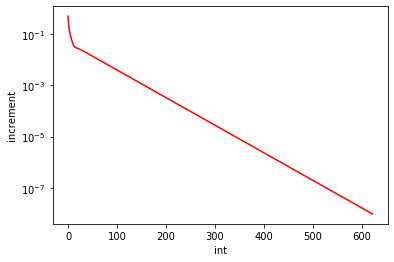

In [10]:
import matplotlib.pyplot as plt

x, incr = gauss_seidel_q6(A,b,b,epsilon) 
print("x=",x)
print("incr=",incr)
plt.semilogy(incr,'r');
#semilogy(incr,'LineWidth',2);
plt.xlabel('int')
plt.ylabel('increment')

# We obtain the following graph:

- We know (see course) that the sequence $∥x(k) − x^∗∥$  behaves like a geometric sequence when $k → \infty$. 

When the matrix is diagonalizable (which is the case here), we can even write

$$ x(k) − x^∗ ∼\lambda^kv $$

for a particular value of $\lambda$  and a particular vector $v$. We compute empirically the convergence rate
$\vert\lambda\vert$ of this sequence from an estimate of the slope of the asymptote.


First, we observe that the sequence of increments also has for rate $\vert\lambda\vert$ : 

$$\begin{array}{cl}
x(k+1)-x(k)&=&x(k+1)-x^∗-x(k)+x^∗\\
&∼&\lambda^{k+1}v-\lambda^kv\\
&=&\lambda^kv′ \quad\mathrm{avec}\quad v′=(1−\lambda)v.
\end{array}$$


So there is a constante $C$ such as

$$e_k ∼\lambda^kC$$

So we have

$$ log(e_k) ∼ k log(\lambda) + log(C)$$
    
So the slope of the line gives us the logarithm of the convergence rate.

Note: a more direct and more general demonstration will be given at the end of class 2.

In [11]:
# Calculation of the empirical convergence rate
# We see graphically that linear convergence is established
# after about 100 iterations, we build the
# right taking (for example) points at iterations 100% and 500.
rate_observe=exp((log(incr[500])-log(incr[100]))/400)
print('rate_observe = ', rate_observe)
# Displayed value:
# rate_observe = 0.97553

                 
                 

rate_observe =  0.9755282581550688


- Calculate the theoretical convergence rate (using the course). Compare the values ​​obtained. Note: Use the following predefined functions: eig, max and abs.


In [12]:
#Construction of the P and N matrices of the Gauss-Seidel decomposition
P=np.zeros((n,n)); 
N=np.zeros((n,n)); 
for i in range(0,n):
    # the first part of the ith line goes into P
    for j in range (0,i+1) :
        P[i,j]=A[i,j];
        
    # the second part goes in N
    for j in range(i+1,n):
        N[i,j]=-A[i,j];

# Obtaining the theoretical convergence rate
theoretical_rate = max(abs(np.linalg.eigvals(np.dot(np.linalg.inv(P),N))));

#Value displayed: Theoretical_rate = 0.97553
print('Theoretical rate =', theoretical_rate);
        

Theoretical rate = 0.975528258147577


## 7) Thomas's method
    
Thomas's method is an evolution of the LU algorithm with a tridiagonal matrix.

When a matrix is tridiagonal, ie, of the form

$$A=\left(\begin{array}[ccccc]
& &a_1 &c_1 & &0\\
&d_2 &a_2 &c_2 &  &\\
& &\ddots &\ddots &\ddots &\\
& &d_{n-1} &a_{n-1} &c_{n-1}\\
&0 &  &d_n &a_n
\end{array}\right)$$


It is shown that decomposition LU produces the following two bidiagonal matrices:

$$L=\left(\begin{array}[ccccc]
& &1 & & &0\\
&\beta_2 &1  &  &\\
& &\ddots &\ddots & &\\
&0 & &\beta_n &1
\end{array}\right)$$

$$A=\left(\begin{array}[ccccc]
& &\alpha_1 &c_1 & &0\\
& &\ddots &\ddots & &\\
& & &\ddots &c_{n-1}\\
&0 &  &&\alpha_n
\end{array}\right)$$

where the elements $\alpha_i$ and $\beta_i$ are obtained thanks to recurrence relations:

$\alpha_1=a_1$

then for $i=2,...,n$,

$\left\lbrace
\begin{array}[cc]
&\beta_i&=& \frac{d_i}{\alpha_i -1} \\
\alpha_i&=&a_i-\beta_i c_{i-1}
\end{array}
\right.$


Based on this decomposition, the system resolution $Ax = b \Leftrightarrow (LU)x = b$ can then be done in a simpler way than in the general case (seen in progress). This algorithm is called the algorithm of Thomas.

• Write (on paper) a resolution algorithm for the equation  $(LU)x = b$ where $L$ and $U$ are of the form above

We start by solving $Ly = b$ :

$y_1 =b_1$ then for $i=2,...,n y_i =b_i−\beta_i y_{i−1}$;

Then we solve $Ux = y$ :

$x_n = \frac{y_n}{\alpha_n}$ puis, pour $i = n − 1, . . . , 1$ $x_i = \frac{y_i − c_ix_{i+1}}{\alpha_i}$.

•  Create (or complete) the thomas.m script that takes a matrix $A$  supposed tridiagonal, a vector $b$, performs the  LU decomposition given above and solves the system.


In [13]:
def thomas(A,b):
    n=size(b);
    alpha=np.zeros((n,1)); 
    beta=np.zeros((n,1)); 
    #First loop: calculation of the coeff. alpha (i) and beta (i)
    alpha[0] = A[0,0]
    
    for i in range(1,n):
        beta[i] = A[i,i-1]/alpha[i-1]
        alpha[i] = A[i,i] - beta[i]*A[i-1,i]
 
    #  second loop: determination of y (i)
    y=zeros((n,1)) 
    y[0]=b[0]
    for i in range(1,n):
        y[i] = b[i] - beta[i]*y[i-1]
    
        
    #  third loop: system resolution => calculation of x (i)
    x=np.zeros((n,1))
    x[n-1]=y[n-1]/alpha[n-1]
    for i in range(n-2,0,-1):
        x[i] = (y[i]-A[i,i+1]*x[i+1])/alpha[i]
    
    print(x)
    return (x)

• Test it on the circuit problem; make sure you get the same solution

In [14]:
# We solve the system of n-1 equations by the method of Thomas.
x2 = thomas(A,b);
print(x2)

[[0.  ]
 [0.54]
 [0.52]
 [0.49]
 [0.45]
 [0.4 ]
 [0.34]
 [0.27]
 [0.19]
 [0.1 ]]
[[0.  ]
 [0.54]
 [0.52]
 [0.49]
 [0.45]
 [0.4 ]
 [0.34]
 [0.27]
 [0.19]
 [0.1 ]]


Twice, we obtain the same result: the algorithm seems to work.